In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

In [7]:
dataset1=pd.read_csv("country_vaccinations.csv")
#dataset1.info()
#dataset1.isnull().sum()
#dataset1.describe()
dataset1.drop(columns=[], axis=1, inplace=True)
dataset1.drop(columns=[], axis=1, inplace=True)
dataset1.drop(columns=dataset1.columns[3:7], axis=1, inplace=True)
dataset1.drop(columns=dataset1.columns[4:7], axis=1, inplace=True)
dataset1.drop(columns="iso_code", axis=1, inplace=True)
dataset1.drop(columns=["source_name", "source_website"], axis=1, inplace=True)
dataset1.drop(columns="vaccines", axis=1, inplace=True)

In [8]:
dataset1["daily_vaccinations"].fillna(0, inplace=True)
dataset1["daily_vaccinations_per_million"].fillna(0, inplace=True)

/tmp/ipykernel_39188/1126668491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset1["daily_vaccinations"].fillna(0, inplace=True)
/tmp/ipykernel_39188/1126668491.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset2=dataset1.copy()
dataset1["date"]=le.fit_transform(dataset1["date"])

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset1["daily_vaccinations"]=sc.fit_transform(dataset1[["daily_vaccinations"]])
dataset1["daily_vaccinations_per_million"]=sc.fit_transform(dataset1[["daily_vaccinations_per_million"]])

## Clustering:
##### we will make clustering models to cluster vaccination days in the world:

In [11]:
cluster_dataset=dataset1
cluster_dataset.drop(columns=["country", "date"], axis=1, inplace=True)

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1, 100):
    print(i)
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(cluster_dataset)
    wcss.append(kmeans.inertia_)
#wcss

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


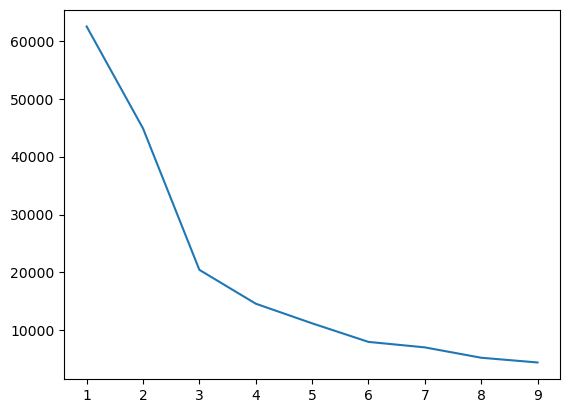

In [13]:
plt.plot(range(1, 10), wcss[:9])
plt.show()

In [14]:
# we notice from the plot that k should be 4:
k=4
kmeans=KMeans(n_clusters=k, init="k-means++", random_state=42)
kmeans.fit(cluster_dataset)
labels=kmeans.labels_

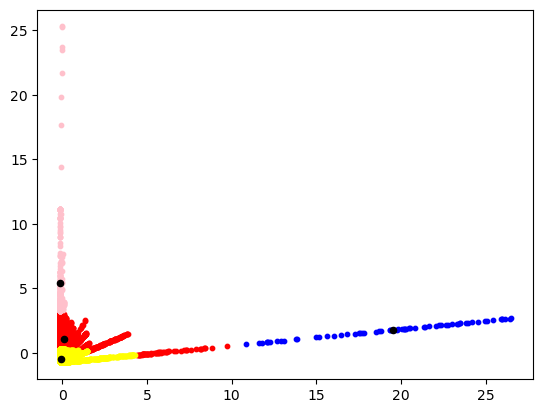

In [15]:
plt.scatter(cluster_dataset.to_numpy()[labels==0,0],  cluster_dataset.to_numpy()[labels==0, 1],s=10,  c="red", label="c1")
plt.scatter(cluster_dataset.to_numpy()[labels==1,0],  cluster_dataset.to_numpy()[labels==1, 1],s=10,  c="yellow", label="c2")
plt.scatter(cluster_dataset.to_numpy()[labels==2,0],  cluster_dataset.to_numpy()[labels==2, 1],s=10,  c="blue", label="c3")
plt.scatter(cluster_dataset.to_numpy()[labels==3,0],  cluster_dataset.to_numpy()[labels==3, 1],s=10,  c="pink", label="c4")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c="black", label="center")
plt.show()

### DBSCAN modeling:

In [16]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.85, min_samples=5)
db.fit(cluster_dataset)

DBSCAN(eps=0.85)

In [17]:
labels=db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

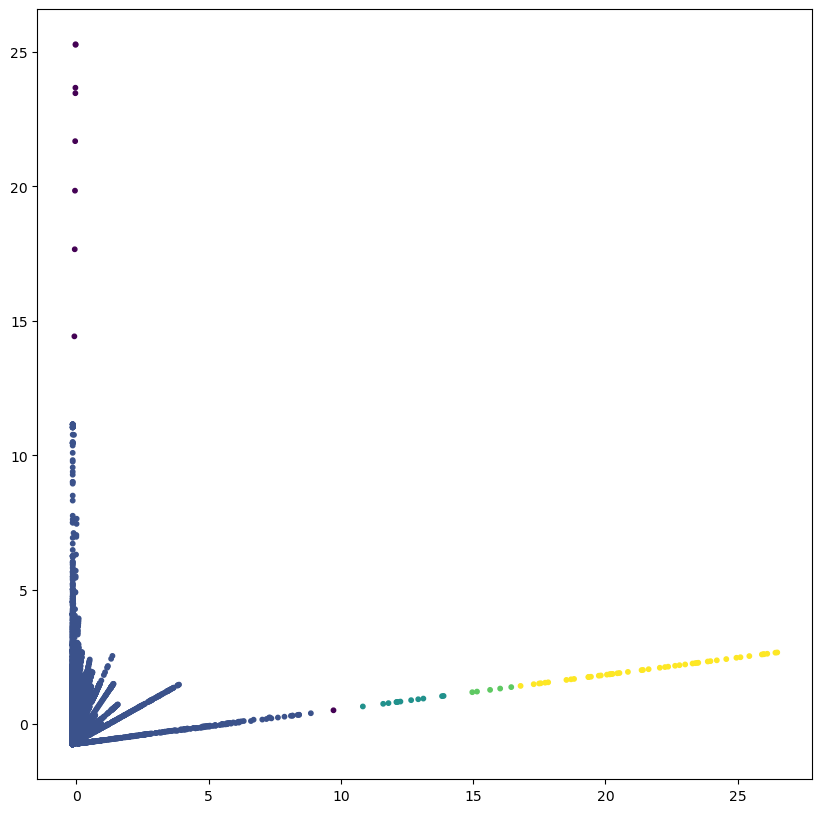

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(cluster_dataset.to_numpy()[:, 0], cluster_dataset.to_numpy()[:, 1], c=labels, cmap='viridis', s=10)
plt.show()

# second dataset:

In [19]:
dataset2=pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [20]:
dataset2.head(3)

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0


In [29]:
#we have just four vaccine
vaccine=["johnson&johnson", "moderna", "oxford", "pfizer"]
dataset2.head(10)

,location,date,vaccine,total_vaccinations
0,Austria,19,Johnson&Johnson,0
1,Austria,19,Moderna,0
2,Austria,19,Oxford/AstraZeneca,0
3,Austria,19,Pfizer/BioNTech,30974
4,Austria,26,Johnson&Johnson,0
5,Austria,26,Moderna,88
6,Austria,26,Oxford/AstraZeneca,0
7,Austria,26,Pfizer/BioNTech,115540
8,Austria,33,Johnson&Johnson,0
9,Austria,33,Moderna,300


In [54]:
le=LabelEncoder()
dataset2["date"]=le.fit_transform(dataset2["date"])
dataset2["vaccine"]=le.fit_transform(dataset2["vaccine"])
dataset2.drop(columns=["location"], axis=1, inplace=True)

In [55]:
dataset2

,date,vaccine,total_vaccinations
0,19,1,0
1,19,2,0
2,19,3,0
3,19,4,30974
4,26,1,0
...,...,...,...
9152,206,4,1229299
9153,206,6,3140277
9154,207,3,61907
9155,207,4,1255929


<Axes: >

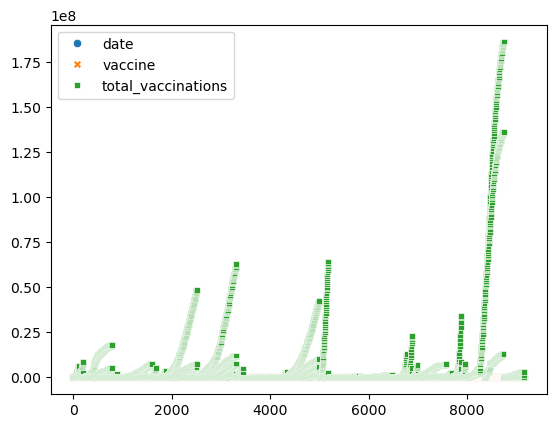

In [35]:
sns.scatterplot(dataset2)

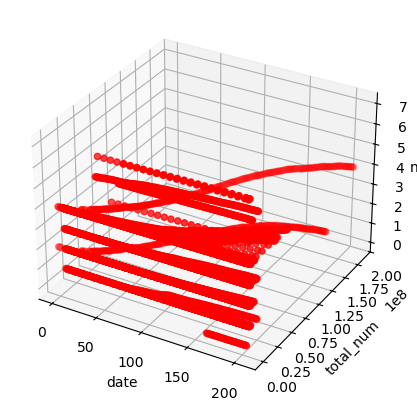

In [51]:
fig=plt.figure(figsize=(5, 5))
ax=fig.add_subplot(111, projection="3d")
ax.scatter(dataset2["date"], dataset2["total_vaccinations"], dataset2["vaccine"], c="r", marker="o")
ax.set_xlabel("date")
ax.set_ylabel("total_num")
ax.set_zlabel("name")

plt.show()

In [68]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.4, min_samples=4)
db.fit(dataset2)

DBSCAN(eps=0.4, min_samples=4)

In [69]:
labels=db.labels_

In [70]:
labels

array([ 0,  1,  2, ..., -1, -1, -1])

In [71]:
num=0
for item in labels:
    if item>num:
        num=item
        print(item)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
# showing the plot is not so easy! because it is 3D.